Uma vez ja tendo falado do dplyr, vemos a seguir como é feito o acesso a api do spark através deste, de forma a utilizar tudo que este backend proporciona para escalonamento do codigo

In [1]:
install.packages('sparklyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Uma vez tendo instalado, importamos o dplyr, e o sparklyr, biblioteca que faz a interface com o spark utilizando a sintaxe dplyr

In [2]:
require(dplyr) #Importando a biblioteca
require(sparklyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sparklyr


Attaching package: ‘sparklyr’


The following object is masked from ‘package:stats’:

    filter




Caso o spark não esteja instalado em sua maquina para testes, este pode ser instalado a partir da propria biblioteca sparklyr com o seguinte comando:

In [3]:
spark_install(version='3.0.0')

Finalmente tendo configurado o ambiente. vamos explorar o spark




# Acessando o ambiente

Nesta seção mostraremos como o ambiente é acessado e informações a partir dele são obtidas

primeiramente para criar uma configuração customizada, acessa se a configuração padrão a partir da função spark_config

In [4]:
configuracao=spark_config()

Este objeto pode ser editado, por exemplo aqui modifico o tamanho de memoria do nó spark a ser utilizado

In [5]:
configuracao$`sparklyr.shell.driver-memory`='4g'


Vemos que temos alguns atributos neste objeto, descrevendo as configurações do ambiente spark, vistos a seguir

In [6]:
configuracao

$spark.env.SPARK_LOCAL_IP.local
[1] "127.0.0.1"

$sparklyr.connect.csv.embedded
[1] "^1.*"

$spark.sql.legacy.utcTimestampFunc.enabled
[1] TRUE

$sparklyr.connect.cores.local
[1] 2

$spark.sql.shuffle.partitions.local
[1] 2

$`sparklyr.shell.driver-memory`
[1] "4g"

attr(,"config")
[1] "default"
attr(,"file")
[1] "/usr/local/lib/R/site-library/sparklyr/conf/config-template.yml"

Por fim fazemos a conexão

In [7]:
sc=spark_connect(master='local',config=configuracao)  

Visualizando o objeto de conexão vemos que este é uma lista com diversos metadados

In [8]:
names(sc)

[1] "master"       "method"       "app_name"     "config"       "state"       
 [6] "extensions"   "spark_home"   "backend"      "monitoring"   "gateway"     
[11] "output_file"  "sessionId"    "home_version"

Em especial ao acessar o metodo config podemos verificar os metadados de configuração do ambiente spark pre estabelecido.

In [9]:
sc$config

$spark.env.SPARK_LOCAL_IP.local
[1] "127.0.0.1"

$sparklyr.connect.csv.embedded
[1] "^1.*"

$spark.sql.legacy.utcTimestampFunc.enabled
[1] TRUE

$sparklyr.connect.cores.local
[1] 2

$spark.sql.shuffle.partitions.local
[1] 2

$`sparklyr.shell.driver-memory`
[1] "4g"

$sparklyr.shell.name
[1] "sparklyr"

attr(,"config")
[1] "default"
attr(,"file")
[1] "/usr/local/lib/R/site-library/sparklyr/conf/config-template.yml"

assim vemos que a configuração foi feita de forma correta e temos acesso ao ambiente spark.

a seguir vamos carregar um dataset simples para ser explorado

In [10]:
Link='https://raw.githubusercontent.com/fportoDexl/cursoBigData/main/data/titanic.csv'

In [11]:
download.file(Link,destfile='Dataset.csv')

Para carregar este dataset no spark, utilizamos a função spark_read_csv

Sua sintaxe é Dado=spark_read_csv(conexao,Caminho,NomeTabela (opcional) )

In [50]:
Particoes=2

In [51]:
Dataset_Spark=spark_read_csv(sc,'Dataset.csv',repartition = Particoes)

In [52]:
Dataset_Spark

# Source: spark<Dataset_0c317872_6a76_402f_9238_2c4f962ed559> [?? x 12]
   PassengerId Survived Pclass Name  Sex     Age SibSp Parch Ticket   Fare Cabin
         <int>    <int>  <int> <chr> <chr> <dbl> <int> <int> <chr>   <dbl> <chr>
 1         770        0      3 Gron… male     32     0     0 8471     8.36 NA   
 2         764        1      1 Cart… fema…    36     1     2 113760 120    B96 …
 3          39        0      3 Vand… fema…    18     2     0 345764  18    NA   
 4         446        1      1 Dodg… male      4     0     2 33638   81.9  A34  
 5         543        0      3 Ande… fema…    11     4     2 347082  31.3  NA   
 6         535        0      3 Caci… fema…    30     0     0 315084   8.66 NA   
 7         496        0      3 Yous… male     NA     0     0 2627    14.5  NA   
 8         606        0      3 Lind… male     36     1     0 349910  15.6  NA   
 9         232        0      3 Lars… male     29     0     0 347067   7.78 NA   
10         778        1      3 Eman… 

Vemos que diferentemente de um dataframe convecional, este é um dataset spark e portanto este não reside na memoria local, mas sim distribuido entre os multiplos nós spark. 

Um ponto de relevancia aqui e que a sintaxe dplyr nos permite que diversos comandos sejam executados independentemente do ambiente

Para demonstrar isto, carreguemos o mesmo dataset em memoria usando a sintaxe padrão da linguagem R

In [14]:
Dataset=read.csv('Dataset.csv')

In [15]:
head(Dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Outra forma de se obter um dataframe spark é de lelo em memoria e depois fazer a transferencia de memoria para o ambiente spark. Para fazelo podemos usar o comando copy_to, repare como as funções de ingestão de objetos no ambiente spark requerem a conexão como um dos parametros

In [16]:
Dado=copy_to(sc,Dataset)

In [17]:
Dado

# Source: spark<Dataset> [?? x 12]
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1 

E se quisermos ver quais os datasets contidos no ambiente spark, podemos visualizar com o comando src_tbls

In [18]:
src_tbls(sc)



[1] "dataset"                                     
[2] "dataset_ec2c5adb_abcd_4ae1_b551_add0fc8b0fec"

Como discutido ja no exemplo anterior, o dplyr traz varias funções em uma estrutura SQL, assim mostramos a seguir como a mesma função é aplicavel nos dois datasets.

A seguir algumas queries:

- Querie A: Conte o numero de homens e mulheres no dataset agrupados pelo fato de se sobreviveram ou não

- Querie B: Para cada classe vendida e genero observe o preço medio de venda, Alem disto calcule a idade media das pessoas que adquiriram esta passagem, por fim gere uma visualização desta


In [19]:
Dataset %>% group_by(Survived) %>% count(Sex)

Survived,Sex,n
<int>,<chr>,<int>
0,female,81
0,male,468
1,female,233
1,male,109


In [20]:
Dataset_Spark %>% group_by(Survived) %>% count(Sex)

# Source: spark<?> [?? x 3]
# Groups: Survived
  Survived Sex        n
     <int> <chr>  <dbl>
1        0 male     468
2        1 female   233
3        0 female    81
4        1 male     109

In [22]:
require(ggplot2)

Loading required package: ggplot2



`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


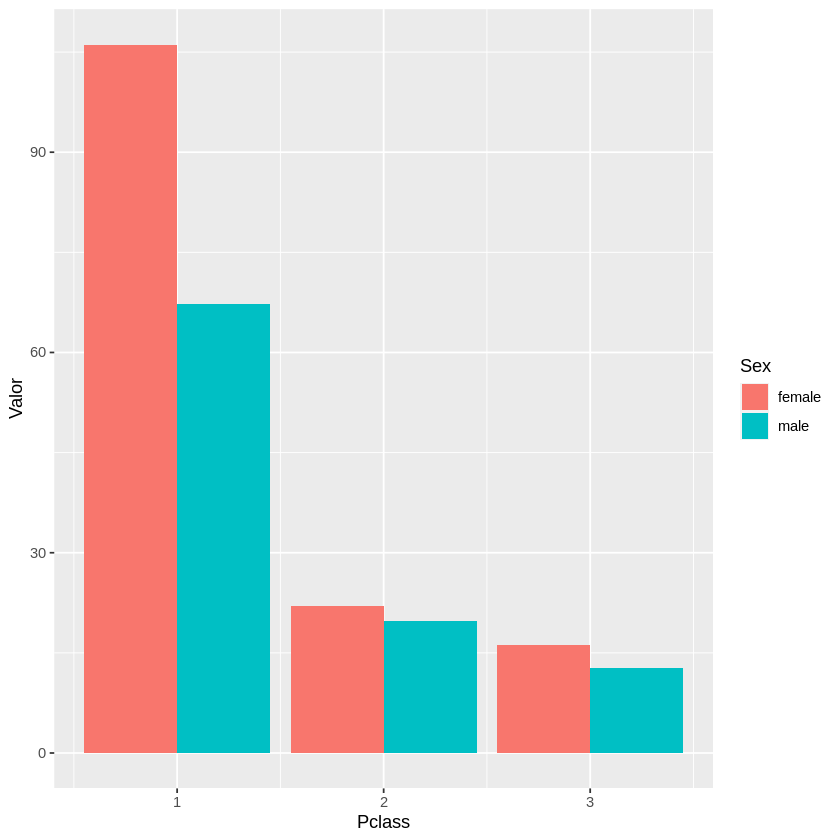

In [23]:
Dataset %>% group_by(Sex,Pclass) %>% summarize(Valor= mean(Fare,na.rm=TRUE),Idade=mean(Age,na.rm=TRUE) ) %>%
ggplot() + aes(x=Pclass,y=Valor,fill=Sex) + geom_col(position = 'dodge')

`summarise()` has grouped output by 'Sex'. You can override using the `.groups` argument.


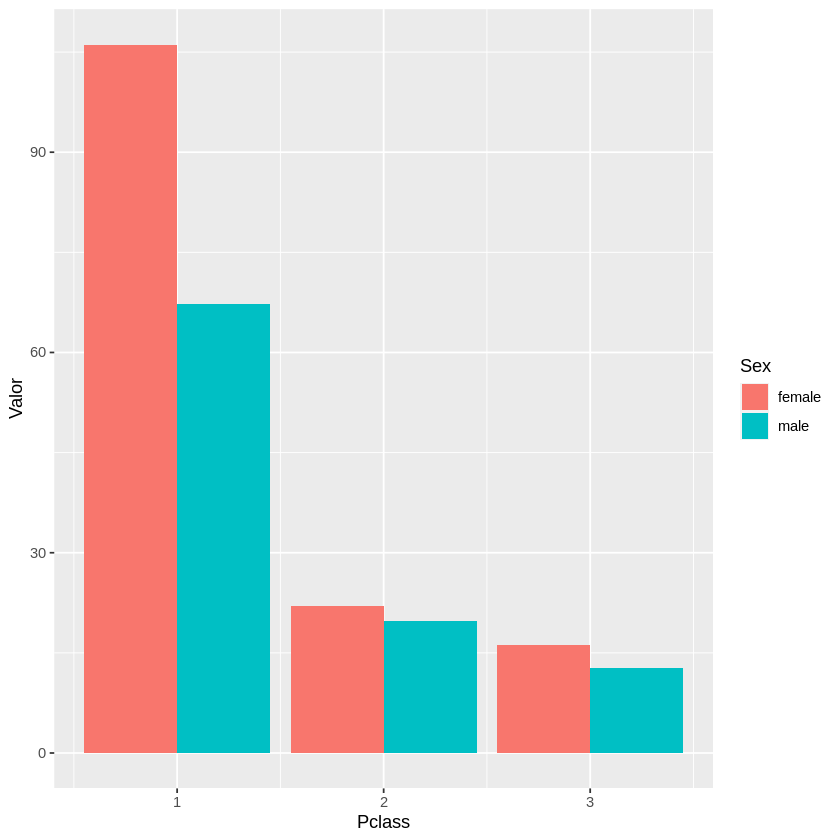

In [24]:
Dataset_Spark %>% group_by(Sex,Pclass) %>% summarize(Valor= mean(Fare,na.rm=TRUE),Idade=mean(Age,na.rm=TRUE) ) %>%
ggplot() + aes(x=Pclass,y=Valor,fill=Sex) + geom_col(position = 'dodge')

Um ponto observado, e que enquanto as queries possuem o mesmo resultado, a saida das queries spark não esta armazenada em memoria

Alguns pacotes atualmente lidam com esta questão e trazem o objeto a memoria apos a realização do grafo de execução da tarefa spark. Para garantir que uma querie esteja em memoria, inclua o comando collect() no final da querie. por exemplo

In [25]:
df=Dataset_Spark %>% group_by(Sex,Pclass) %>% summarize(Valor= mean(Fare),Idade=mean(Age) )

In [26]:
df

Warning message:
“Missing values are always removed in SQL.
Use `mean(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”
`summarise()` has grouped output by 'Sex'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Sex'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Sex'. You can override using the `.groups` argument.


# Source: spark<?> [?? x 4]
# Groups: Sex
  Sex    Pclass Valor Idade
  <chr>   <int> <dbl> <dbl>
1 male        3  12.7  26.5
2 female      2  22.0  28.7
3 female      1 106.   34.6
4 female      3  16.1  21.8
5 male        1  67.2  41.3
6 male        2  19.7  30.7

In [27]:
df %>% collect()

Sex,Pclass,Valor,Idade
<chr>,<int>,<dbl>,<dbl>
male,3,12.66163,26.50759
female,2,21.97012,28.72297
female,1,106.12580,34.61176
female,3,16.11881,21.75000
male,1,67.22613,41.28139
male,2,19.74178,30.74071


Outro ponto relevante a ser dito, que para aqueles ja acostumados com SQL, podemos utilizar o pacote DBI que nos permite a interface a sistemas de banco de dados. A partir desta podemos executar o comando dbGetQuery, que espera a referencia de conexão ao banco e a query SQL

In [53]:
require(DBI)
dbGetQuery(sc, "select Sex,Pclass,mean(Fare),mean(Age)  from dataset  group by Sex, Pclass") 

Sex,Pclass,mean(Fare),mean(Age)
<chr>,<int>,<dbl>,<dbl>
male,3,12.66163,26.50759
female,2,21.97012,28.72297
female,1,106.12580,34.61176
female,3,16.11881,21.75000
male,1,67.22613,41.28139
male,2,19.74178,30.74071


Assim vemos que o dataframe spark volta a ser um dataframe comum em memoria apos o comando collect.

- Exercicio 1: Realize as queries acima incluindo novas metricas como desvio padrão, minimo e maximo

- Exercicio 2: Verifique que os exercicios explorados no modulo anterior podem ser executados no spark facilmente. para tal utilize a função copy_to do spark para transferir o dataset iris para o ambiente spark

Apos passado esta parte, outro ponto sobre o spark e conhecido como lazy_evaluation, isto se trata do fato que a querie spark so é executada quando nescessario, assim podendo otimizar internamente a execução. Para verificar isto podemos mostrar um comparativo entre o dataframe normal e o dataframe spark com as consultas ja apresentadas usando a forma funcional destas

In [37]:
Start=Sys.time()
d=Dataset 
print(Sys.time()-Start)
Start=Sys.time()
d=group_by(d,Sex,Pclass) 
print(Sys.time()-Start)
Start=Sys.time()
d=summarize(d,Valor= mean(Fare,na.rm=TRUE),Idade=mean(Age,na.rm=TRUE) ) 
print(Sys.time()-Start)


Time difference of 0.002375841 secs
Time difference of 0.007621527 secs


`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Time difference of 0.03135061 secs


In [38]:
class(Dataset_Spark)

[1] "tbl_spark" "tbl_sql"   "tbl_lazy"  "tbl"

In [39]:
class(Dataset)

[1] "data.frame"

Este experimento é interessante em um dataset maior

In [36]:
Start=Sys.time()
d=Dataset_Spark 
print(Sys.time()-Start)
Start=Sys.time()
d=group_by(d,Sex,Pclass) 
print(Sys.time()-Start)
Start=Sys.time()
d=summarize(d,Valor= mean(Fare,na.rm=TRUE),Idade=mean(Age,na.rm=TRUE) ) 
print(Sys.time()-Start)


Time difference of 0.002100706 secs
Time difference of 0.03511953 secs
Time difference of 0.00559473 secs


In [48]:
head(Dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# Joins em tabelas

# Aplicando Metodos da linguagem R dentro do spark

Um ponto importante tambem se trata que metodos da linguagem R podem ser aplicados dentro do ambiente spark, neste caso o metodo seria mapeado para cada uma das partições para que a função seja executada nestas.

A seguir um exemplo onde conto a quantia de pessoas que sobreviveram ou não, vemos que como esta função poderia ser descrita na linguagem sql o resultado dela usando a notação dplyr ja faz tanto a execução nas repartições, como a redução destas

In [55]:
Dataset_Spark %>% count(Survived)

# Source: spark<?> [?? x 2]
  Survived     n
     <int> <dbl>
1        0   549
2        1   342

In [56]:
Contagem=Dataset_Spark %>% spark_apply(function(df) table(df[,'Survived']) )

In [57]:
Contagem

# Source: spark<?> [?? x 2]
  Var1   Freq
  <chr> <int>
1 0       275
2 1       171
3 0       274
4 1       171

Assim vemos que neste caso precisamos fazer o reduce, para o operação de contagem isto se resume a agrupar por Var e somar a frequencia

In [58]:
Contagem %>% group_by(Var1) %>% summarize(Freq=sum(Freq))

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”


# Source: spark<?> [?? x 2]
  Var1   Freq
  <chr> <dbl>
1 1       342
2 0       549

Assim Gerando o resultado. Claro poderiamos aplicar funções bem mais complexas no spark_apply, por exemplo considere que queremos gerar uma regressão linear onde o alvo é Fare e os descritores são Idade e sexo. Fariamos da seguinte forma

In [65]:
require(broom)

Loading required package: broom



In [71]:
spark_apply(
  Dataset_Spark,
  function(df) broom::tidy(lm(Fare ~ Age+Sex, df)),
  names = c("term", "estimate", "std.error", "statistic", "p.value")
  )

# Source: spark<?> [?? x 5]
  term        estimate std.error statistic   p.value
  <chr>          <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)   25.2       6.20       4.07 0.0000578
2 Age            0.291     0.192      1.51 0.131    
3 (Intercept)   23.5       6.55       3.59 0.000383 
4 Age            0.403     0.193      2.08 0.0381   

Em contrapartida, se ao inves de queremos usar as partições de forma independente, mas sim de ajustar modelos por grupos, a função spark apply pode ser usada com o argumento group_by, aqui um exemplo de como realizariamos este ao reorganizar os nos para sobrevivencia

In [78]:
spark_apply(
  Dataset_Spark,
  function(df) broom::tidy(lm(Fare ~ Age+Sex, df)),
  names = c("term", "estimate", "std.error", "statistic", "p.value"),
  group_by=c('Survived')
  )

# Source: spark<?> [?? x 6]
  Survived term        estimate std.error statistic  p.value
     <int> <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1        1 (Intercept)   34.0       9.33      3.64  0.000319
2        1 Age            0.750     0.274     2.74  0.00660 
3        1 Sexmale      -10.7       8.77     -1.22  0.224   
4        0 (Intercept)   18.4       4.79      3.84  0.000140
5        0 Age            0.174     0.109     1.59  0.111   
6        0 Sexmale       -0.918     4.32     -0.212 0.832   

Em especial como a função spark_apply so aceita um elemento como agrupamento, para agrupar por multiplas colunas o que pode ser feito e se criar uma nova coluna que agrega as informações do controle

Para execução mais rapida calculamos o numero de linhas para todo possivel valor de controle

In [87]:
Dataset_Spark %>% mutate(Controle=paste0(Survived,Pclass)) %>% 
spark_apply(
  function(df) nrow(df),
  names = 'Media',
  group_by=c('Controle')
)

# Source: spark<?> [?? x 2]
  Controle Media
  <chr>    <int>
1 01          80
2 12          87
3 02          97
4 03         372
5 11         136
6 13         119

#MLIB

# Usando o spark sem modificar seu pipeline: Integração no ambiente paralelo do R

In [ ]:
spark_disconnect(sc)

Fim